In [1]:
import sys
sys.path.append('/home/tpopova/prj/PB_SCF/06_sphere_brush/py_files')

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

from math import pi
from create_in import create_in
from free_energy import free_energy

In [2]:
r_sphere = 10
N = 200
chi_surf = -0.55
chi = 0.5
alpha = 0.5
Cs_values = [0.003, 0.005, 0.008]
S = 70
N_layers = N - 110

In [3]:
file_name_pro_list = []

for Cs in Cs_values:
    file_name_pro = create_in(
        template_shpere = '/home/tpopova/prj/PB_SCF/06_sphere_brush/scf_templates/sphere.in',
        
        #название параметра
        range_param = 'cs',
        min_val = 0.1,
        max_val = 0.1,
        
        r_sphere = r_sphere,
        Cs = Cs,
        chi = chi,
        chi_surf = chi_surf,
        
        N_layers = N_layers,
        N = N,
        
        S = S,
        alpha = alpha)
    
    file_name_pro_list.append(file_name_pro)

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 1.216856e+00 |g| = 2.164759e+00 alpha = 1.000000e+00 
hessian scaling: 1.86046
it =  1  E = 1.002871e+00 |g| = 1.617386e+00 alpha = 1.461945e-01 
it =  2  E = 6.707860e-01 |g| = 1.522519e+00 alpha = 2.848847e-01 
it =  3  E = 1.154617e+00 |g| = 1.377773e+00 alpha = 8.048057e-02 
it =  4  E = 9.328506e-01 |g| = 1.255165e+00 alpha = 1.044698e-01 
it =  5  E = 8.889166e-01 |g| = 1.149821e+00 alpha = 9.851336e-02 
it =  6  E = 8.469936e-01 |g| = 1.057234e+00 alpha = 9.365784e-02 
it =  7  E = 8.033903e-01 |g| = 9.746079e-01 alpha = 9.042701e-02 
it =  8  E = 7.599444e-01 |g| = 9.001394e-01 alpha = 8.824830e-02 
it =  9  E = 7.179759e-01 |g| = 8.326212e-01 alpha = 8.671948e-02 
it =  10  E = 6.783392e-01 |g| = 7.712105e-01

In [4]:
f_ion_SCF_quen_values = []

for file_name_pro in file_name_pro_list:
    
    psi, phi_brush, phi_end, f_ion_SCF_quen, Q_SCF_quen, pH_iep_in_quen, d_pH_b = free_energy(
        PK_MINUS=5.0,
        PK_PLUS=4.0,
        f_plus=0.5,
        pH_B=4.7,
        file_names=file_name_pro
    )
    f_ion_SCF_quen_values.append(f_ion_SCF_quen)
print(pH_iep_in_quen)

4.5


<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_2289522/3728723594.py:13: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta F_{{ion}}(z)$', fontsize=18)
/tmp/ipykernel_2289522/3728723594.py:14: SyntaxWarning: invalid escape sequence '\D'
  plt.legend(title = f'$N = {N}, \\theta = {round(4 * pi * r_sphere**2 * N/S, 2)}, R_{{sphere}} = {r_sphere}, \Delta pH_B = {round(d_pH_b, 1)}, pH_{{IEP}} = {round(pH_iep_in_quen, 1)}$',


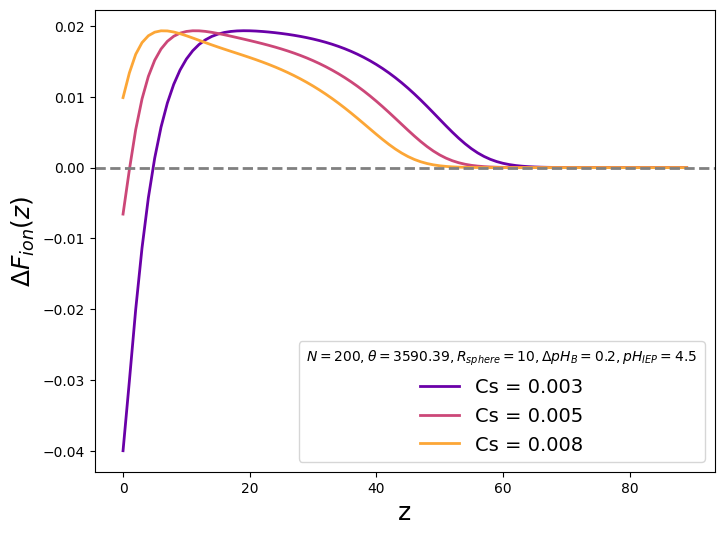

In [ ]:
cmap = cm.plasma(np.linspace(0.2, 0.8, len(Cs_values)))

plt.figure(figsize=(8, 6))

# Плавные линии с палитрой 'plasma'
for i, Cs in enumerate(Cs_values):
    plt.plot(f_ion_SCF_quen_values[i], label=f'Cs = {Cs}', color=cmap[i], linewidth=2)

plt.axhline(y=0, color='gray', linestyle='--', linewidth=2)

# Настройки графика
plt.xlabel('z', fontsize=18)
plt.ylabel('$\Delta F_{{ion}}(z)$', fontsize=18)
plt.legend(title = f'$N = {N}, \\theta = {round(4 * pi * r_sphere**2 * N/S, 2)}, R_{{sphere}} = {r_sphere}, \Delta pH_B = {round(d_pH_b, 1)}, pH_{{IEP}} = {round(pH_iep_in_quen, 1)}$',
           loc='lower right',
           fontsize=14)

# Отображаем график
# plt.savefig('shapere_var_Cs.pdf', dpi=300, bbox_inches='tight')
plt.show()